
# Preparation for Exercise 1



## Test the Installation

This file can be used to ensure the successful installation of Python, JupyterLab and the “cryptography” package. Individual cells can be executed with Shift+Enter or the play button above this window.

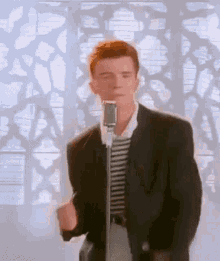

In [13]:
from IPython.display import Image

from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

key = "sup3r_s3cur3_k3y"
iv = "s4p3r_s3cur3_iv_"

# read file as binary data
with open("encrypted_blob.dat", "rb") as f:
    data = bytearray(f.read())

# create an AES CTR decryptor
cipher = Cipher(algorithms.AES(key.encode()), modes.CTR(iv.encode()))
decryptor = cipher.decryptor()
pt = decryptor.update(data) + decryptor.finalize()

# save decrypted data
with open("output.gif", "wb") as f:
    f.write(pt)
    
Image('output.gif')

## Essentials of the 'cryptography' Package


As a first step, it is a good idea to take a look at the extensive documentation of the package here (https://cryptography.io/en/latest/). It already includes many code examples that allow for direct execution. There are also numerous alternatives, such as PyCryptodome (https://pycryptodome.readthedocs.io/en/latest/), which work in a very similar way.

### Byte encoding and conversion

Byte arrays are usually expected to be of a certain length, i.e. in the case of AES, for example, according to the block size or key length. If you want to encrypt a string, for example, it must first be converted into a byte array - UTF-8 encoding is the default.

In [14]:
sample_input = "This is a test."
encoded_sample_input = sample_input.encode()
print(encoded_sample_input)


b'This is a test.'


Byte arrays can also be defined directly as such and can also be output directly if they are printable letters.

In [15]:
encoded_sample_printable = b'This is test of printable characters.'
print("Printable bytearray", encoded_sample_printable)

encoded_sample_not_printable = b'\x00\x11\x22\x33'
print("Non-printable bytearray", encoded_sample_not_printable)


Printable bytearray b'This is test of printable characters.'
Non-printable bytearray b'\x00\x11"3'


Byte arrays can also be conveniently output as hex strings or read in from hex strings.

In [16]:
print("Converting", key)
print("To hex string", key.encode().hex())

print()

# bytearray can consist of bytes that map to UTF-8 characters which are automatically displayed
hex_string = "73797374656d5f7365637572697479"
print("Converting", hex_string)
print("Back to a bytearray", bytes.fromhex(hex_string))

print()

# but non-printable characters are also possible
hex_string = "20b383af4e82f2aeda119ebd8be746bf"
print("Converting", hex_string)
print("Back to a bytearray", bytes.fromhex(hex_string))


Converting sup3r_s3cur3_k3y
To hex string 73757033725f7333637572335f6b3379

Converting 73797374656d5f7365637572697479
Back to a bytearray b'system_security'

Converting 20b383af4e82f2aeda119ebd8be746bf
Back to a bytearray b' \xb3\x83\xafN\x82\xf2\xae\xda\x11\x9e\xbd\x8b\xe7F\xbf'


The conversion of a byte array into a string only works if these bytes represent printable characters.

In [17]:
# bytearray can consist of bytes that map to UTF-8 characters which are automatically displayed
hex_string = "73797374656d5f7365637572697479"
b_array = bytes.fromhex(hex_string)

print("Converting", hex_string)
print("Back to a bytearray", b_array)
print("Back to a string", b_array.decode())

print()

# but non-printable characters are also possible
hex_string = "20b383af4e82f2aeda119ebd8be746bf"
b_array = bytes.fromhex(hex_string)
print("Converting", hex_string)
print("Back to a bytearray", b_array)
# String conversion only works with printable characters...
print("And back to a string", b_array.decode())

Converting 73797374656d5f7365637572697479
Back to a bytearray b'system_security'
Back to a string system_security

Converting 20b383af4e82f2aeda119ebd8be746bf
Back to a bytearray b' \xb3\x83\xafN\x82\xf2\xae\xda\x11\x9e\xbd\x8b\xe7F\xbf'


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 1: invalid start byte


### Encryption / Decryption

Similar to the example of decrypting a file, different ciphers can be instantiated in different modes. Corresponding block lengths, key lengths, etc. must be observed. This is also noted accordingly in the documentation!

In [18]:
ciphertext = "5b520c98a2c9a577f5b0b1d46d2a4f5f"

# create an AES OFB decryptor
cipher = Cipher(algorithms.AES(key.encode()), modes.OFB(iv.encode()))
decryptor = cipher.decryptor()
pt = decryptor.update(bytes.fromhex(ciphertext)) + decryptor.finalize()

# printable decryption
print("Hex-string", pt.hex())
print("Bytearray", pt)
print("String", pt.decode())

print("Plaintext length:", len(pt))


Hex-string 73797374656d5f73656375726974795f
Bytearray b'system_security_'
String system_security_
Plaintext length: 16


If, for example, we now want to decrypt a ciphertext of a multiple of the block length, we also receive a corresponding number of output blocks.

In [19]:
ciphertext = "5b520c98a2c9a577f5b0b1d46d2a4f5f"
ciphertext = ciphertext + ciphertext

print("Decrypting:", ciphertext)

# create an AES OFB decryptor
cipher = Cipher(algorithms.AES(key.encode()), modes.OFB(iv.encode()))
decryptor = cipher.decryptor()
pt = decryptor.update(bytes.fromhex(ciphertext)) + decryptor.finalize()

# non-printable decryption
print("Hex-string", pt.hex())
print("Bytearray", pt)
print("Plaintext length:", len(pt))
print("String", pt.decode())


Decrypting: 5b520c98a2c9a577f5b0b1d46d2a4f5f5b520c98a2c9a577f5b0b1d46d2a4f5f
Hex-string 73797374656d5f73656375726974795feed6ffe7ff5fe02c7e8b640a58d78875
Bytearray b'system_security_\xee\xd6\xff\xe7\xff_\xe0,~\x8bd\nX\xd7\x88u'
Plaintext length: 32


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xee in position 16: invalid continuation byte

If the block or key size is incorrect, a corresponding error occurs.

In [20]:
key = key[:10]

print("Using shortened key:", key)

# create an AES OFB decryptor
cipher = Cipher(algorithms.AES(key.encode()), modes.OFB(iv.encode()))
decryptor = cipher.decryptor()
pt = decryptor.update(bytes.fromhex(ciphertext)) + decryptor.finalize()

Using shortened key: sup3r_s3cu


ValueError: Invalid key size (80) for AES.


### Sign / Verify

Analogous to the creation of RSA signatures $y = x^d \bmod n$ and for verification $x = y^e \bmod n$, corresponding operations are defined on elliptic curves. These are popular due to their short signatures and efficient calculation and are mainly used in the context of embedded systems. The EdDSA method, which is based on special elliptical curves, so-called Edwards curves (https://en.wikipedia.org/wiki/EdDSA) and generates signatures with 512 bits, is particularly popular. The corresponding use of these signatures can be found in the documentation.


### Narrowing down the key space

Usually, naive guessing of the symmetric key is **not** expedient for AES-128, for example, since in the worst case $2^{128}$ different key candidates have to be tested. However, if an error is known about the key generation or if it is modified after generation so that the key space is restricted, this can significantly simplify the key search using brute force.

Assume the key for the encryption is modified as follows:

In [21]:
import os

# sample cryptographically secure 128-bit key
key = os.urandom(16)

print("Randomly generated key:", key.hex())

# suppose that a selection of the key is always set to a static value
mask = bytes(b'\x00\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\xFF\x00')

# some magic
modified_key = bytes([a | b for a, b in zip(key[::-1], mask[::-1])][::-1])

print("Modified key:", modified_key.hex())


Randomly generated key: a7faf8484de1b411e3f787dd1507c547
Modified key: a7ffffffffffffffffffffffffffff47


Here, only the first and last byte of the key are random, with the middle 14 bytes being static. This results in $2^{16}$ possible key candidates. In the following example, an unknown key is used that has been modified as above. It is also known that the plain text is a GIF file.

Found correct guess: 0fffffffffffffffffffffffffffff8c


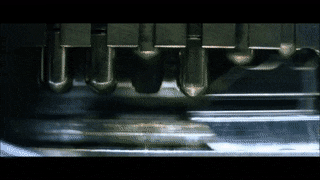

In [22]:
iv = "F000000000000000000000000000000F"

# read file as binary data
with open("encrypted_blob2.dat", "rb") as f:
    data = bytearray(f.read())
    
break_outer = False
    
for byte0 in range(0, 255):
    if break_outer:
        break
        
    for byte15 in range(0, 255):
        
        # create an AES CTR decryptor
        key_guess = bytes.fromhex("{:02x}".format(byte0) + "ffffffffffffffffffffffffffff" + "{:02x}".format(byte15))
        cipher = Cipher(algorithms.AES(key_guess), modes.CTR(bytes.fromhex(iv)))
        decryptor = cipher.decryptor()
        pt = decryptor.update(data) + decryptor.finalize()
        
        # file is known to be a GIF file
        if(pt[0:3] == b'GIF'):
            print("Found correct guess:", key_guess.hex())
            with open("output2.gif", "wb") as f:
                f.write(pt)
            
            break_outer = True
            break
            
Image('output2.gif')